In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

data = pd.read_csv(f"D:\\Artificial Intelligence\\Machine Learning\\_projects\\nn_amira\\data\\processed\\data.csv", header=None)
dataset = data.values


# dublicate random items
num_records, num_features = dataset.shape
selected_item = np.random.choice(num_records, num_records // 2, replace=False)
duplicated_data = dataset[selected_item]
final_dataset = np.vstack((dataset, duplicated_data))
np.random.shuffle(final_dataset)


x = dataset[:, 1:]  # Assuming features start from the second column
y = dataset[:, 0]   # Assuming labels are in the first column
y[y == 11] = 0


norms = np.linalg.norm(x, axis=1, keepdims=True)
x_normalized = x / norms
X_train, X_test, y_train, y_test = train_test_split(x_normalized, y, test_size=0.2, random_state=42)

print("dataset " + str(dataset.shape))
print(dataset[0])
print("x " + str(x.shape))
print(x[0])
print("y " + str(y.shape))
print(y[0])
print(np.unique(y))
print("normalized")
print(x_normalized[0])

num_features = 10


dataset (899, 16382)
[ 1.      9.106   0.6615 ... 10.6785  4.4169  4.5837]
x (899, 16381)
[ 9.106   0.6615  0.     ... 10.6785  4.4169  4.5837]
y (899,)
1.0
[0. 1.]
normalized
[0.00946299 0.00068743 0.         ... 0.01109714 0.00459006 0.0047634 ]


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=num_features)
X_selected = selector.fit_transform(x, y)
selected_indices = selector.get_support(indices=True)
print(selected_indices)

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)




[ 1210  1870  1877  2556  2705  3268  5851  8968 12303 13318]


c:\Users\MAHMOUD TAHA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   41   144   283   284   297   321   365   565   732   824   825   839
  1077  1100  1188  1255  1256  1259  1338  1363  1367  1399  1425  1430
  1461  1619  1655  1743  1766  1891  1993  1994  2003  2031  2032  2224
  2225  2231  2236  2248  2252  2409  2476  2691  2693  2698  2699  2733
  2889  2903  3039  3048  3049  3076  3078  3079  3273  3284  3288  3425
  3463  3895  3994  4036  4050  4051  4052  4135  4933  5009  5033  5242
  5299  5371  5390  5418  5439  5606  5607  5609  5645  5648  5755  6030
  6049  6051  6118  6125  6147  6323  6324  6825  6852  6855  6856  7207
  7218  7357  7403  7420  7421  7440  7602  7800  7857  7858  7913  8000
  8025  8107  8565  9029  9200  9305  9485  9621  9625  9666  9755 10262
 10315 10458 10464 10502 10527 10528 10585 10605 10608 10668 10690 10958
 10959 10962 10963 10964 10965 10966 10

In [31]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

model = tf.keras.Sequential([
    tf.keras.layers.Reshape((num_features, 1), input_shape=(num_features,)),
    tf.keras.layers.Conv1D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Conv1D(128, 3, activation='tanh'),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),  # Add a layer with tanh activation
    tf.keras.layers.Dense(128, activation='tanh'),
    tf.keras.layers.Dense(64, activation='relu'),   # Another layer with tanh activation
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# model.compile(optimizer='adamax', loss='hinge', metrics=[tf.keras.metrics.AUC()])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=30, batch_size=16, validation_data=(x_test, y_test))
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", accuracy)


Epoch 1/30


c:\Users\MAHMOUD TAHA\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8098 - loss: 0.5013 - val_accuracy: 0.8667 - val_loss: 0.3448
Epoch 2/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8292 - loss: 0.4168 - val_accuracy: 0.8704 - val_loss: 0.3501
Epoch 3/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8579 - loss: 0.3854 - val_accuracy: 0.8667 - val_loss: 0.3565
Epoch 4/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8617 - loss: 0.3789 - val_accuracy: 0.8704 - val_loss: 0.3516
Epoch 5/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8272 - loss: 0.4062 - val_accuracy: 0.8704 - val_loss: 0.3526
Epoch 6/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8354 - loss: 0.4178 - val_accuracy: 0.8556 - val_loss: 0.4266
Epoch 7/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8581 - loss: 0.3936 - val_accuracy: 0.8704 - val_loss: 0.3640
Epoch 8/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8378 - loss: 0.4197 - val_accuracy: 0.8704 - val_loss: 0.3445
Ep

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


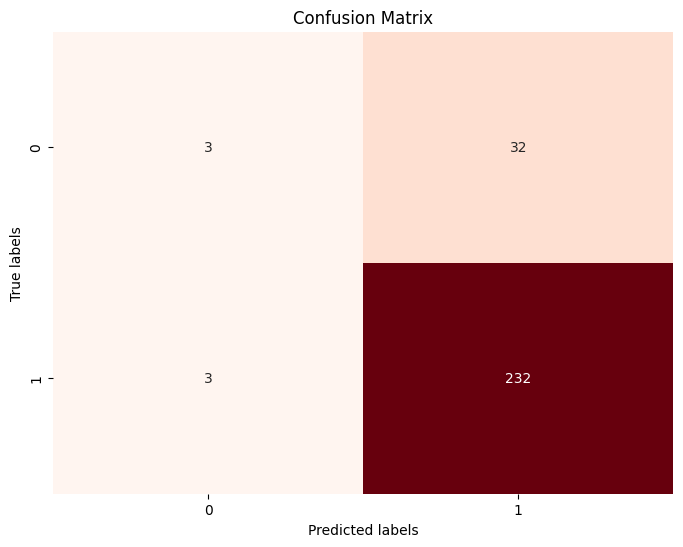

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict classes for test set
y_pred = model.predict(x_test)
y_pred = np.round(y_pred)
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [5]:
import pandas as pd

# Define the file path
file_path = 'D:\\Artificial Intelligence\\Machine Learning\\_projects\\nn_amira\\data\\raw\\data.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Select the first row of columns with the specified indices
selected_columns = df.iloc[0, [ 1213, 1873, 1880, 2559, 2708, 3271, 5854, 8971, 12306, 13321]]

# Print the selected columns
print(selected_columns)


ADH4           0.0
LLGL2        11.58
SLC22A12    0.6615
GLYAT       2.7692
APOB        1.4569
CAV2        8.3649
GPAM        8.9712
GLP2R       0.3684
EPB42          0.0
HSD17B13       0.0
Name: 0, dtype: object


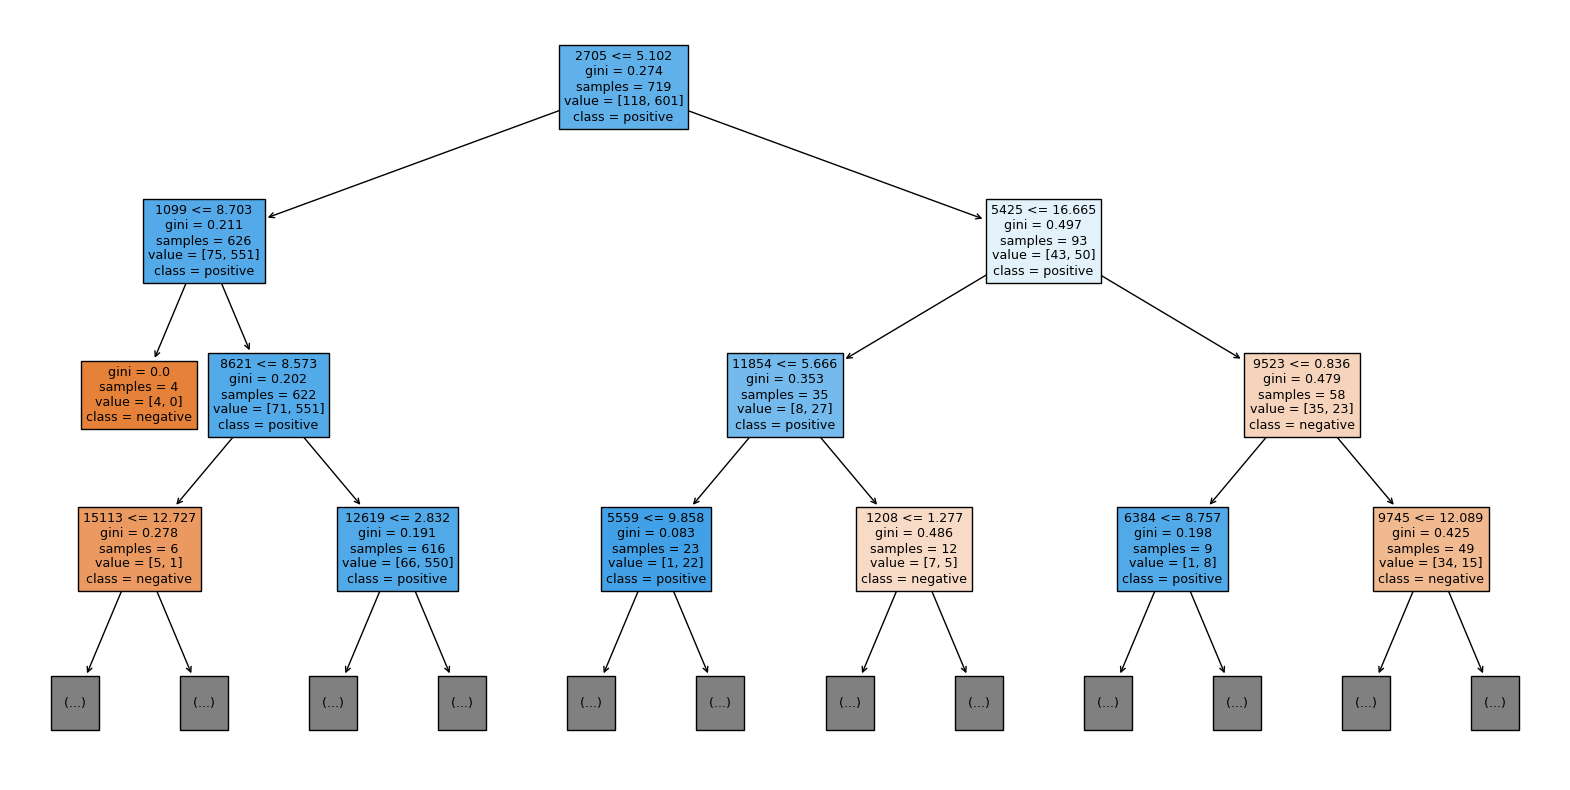

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

class_names = ['negative', 'positive']
# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(clf, max_depth=3, feature_names=selected_indices, class_names=class_names, filled=True)
plt.show()


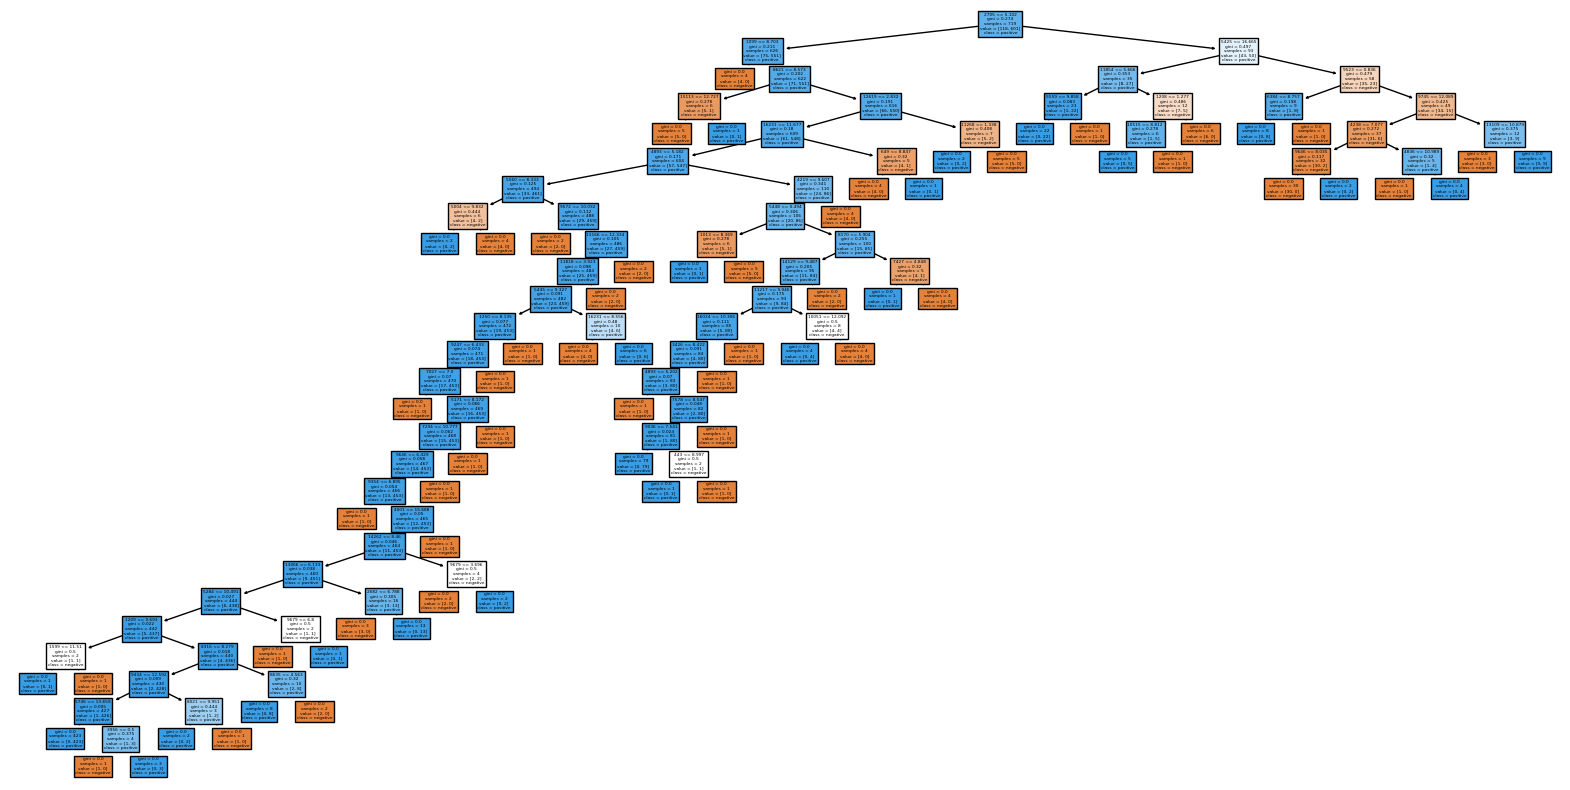

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

class_names = ['negative', 'positive']
# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=selected_indices, class_names=class_names, filled=True)
plt.savefig('decision_tree_figure.png' , dpi=300)  # Save the figure to a file path
plt.show()


In [ ]:
import joblib

# Load the saved model
joblib.dump(clf, 'decision_tree_model.pkl')


['decision_tree_model.pkl']

In [ ]:
x_new = x[:, selected_indices]

In [ ]:
print(x_new.shape)
print(x_new[0])

(899, 1000)
[ 0.6615  3.7243  7.7967  2.3426 10.164   7.5095  9.6391  3.6593 10.6529
  1.6022  7.2112 10.1916 11.8954  6.7398  2.423   9.9091  8.8654  0.
 11.0498  4.1595  0.3684 10.4522  0.     10.4401  8.3687 13.0945  7.6623
  4.9658  8.3104  6.8088  9.9718  7.0143  9.3961  8.8868  8.2261  5.2007
  7.8756  0.905   7.1326 10.0582  6.0291  6.853   8.4125 10.3485  7.9127
  0.905   8.9628  6.2922  0.905   0.905   2.8295  3.7227  2.943   1.6022
  5.5886 11.7556  9.0269  3.7243  4.9792  6.5867 10.2371  5.3522  0.
  5.908   7.9956  8.8197  3.8749  4.0624  8.0895  5.2121  9.3338  7.4884
  0.3684  2.8873  9.2515  8.1275  6.6959 10.5534  0.      3.098   7.011
 11.8991  0.3684  0.6615 11.0441  0.      3.4829  7.4216  6.2153  4.2724
  7.2884  9.1502 10.3982  0.      6.3188  6.6959  8.3889  9.8402  0.905
  6.8013  6.6673  3.6257 11.8436  1.4569  6.4873  9.1264  8.6283  3.846
 10.6306  5.4321  0.6615 10.0272  9.3704  7.6758  7.654   4.8542  0.905
  8.3675  0.905   3.1929  6.2321 10.2391 11.58    0

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 1000, 1)           0         
                                                                 
 conv1d (Conv1D)             (None, 998, 32)           128       
                                                                 
 max_pooling1d (MaxPooling1  (None, 499, 32)           0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 497, 64)           6208      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 248, 64)           0         
 g1D)                                                            
                                                                 
 flatten (Flatten)           (None, 15872)             0

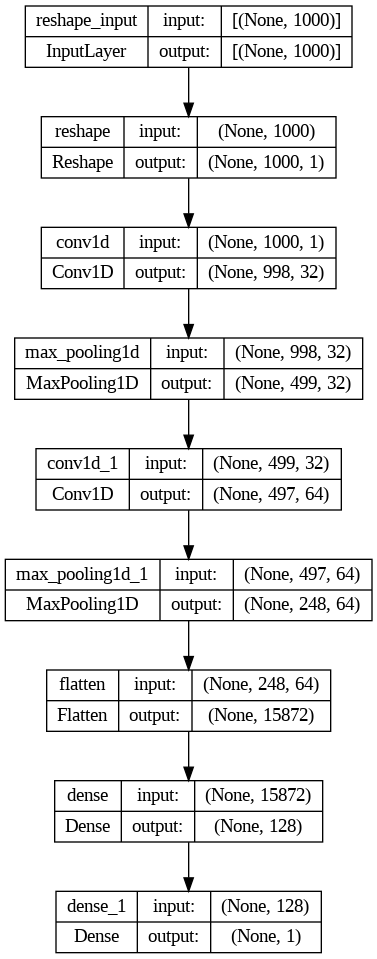

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
from sklearn.decomposition import PCA

# Assuming x is your numpy array with shape (899, 1000)

# Define the number of components you want to reduce to
num_components = 50  # You can adjust this number based on your requirements

# Initialize the PCA model
pca = PCA(n_components=num_components)

# Fit the model to your data and transform the data
x_pca = pca.fit_transform(x_new)

# Print the shape of the transformed data
print("Shape of x after PCA:", x_pca.shape)


Shape of x after PCA: (899, 50)


In [ ]:
np.save("x_pca", x_pca)

In [ ]:
from sklearn.cluster import KMeans

# Assuming x is your numpy array with shape (899, 1000)

# Define the number of clusters you want
num_clusters = 5  # You can adjust this number based on your requirements

# Initialize the KMeans model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit the model to your data
kmeans.fit(x)

# Get the cluster labels for each sample
cluster_labels = kmeans.labels_

# Print the cluster labels
print(cluster_labels)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[3 0 2 4 3 2 3 3 2 0 4 2 3 2 0 0 2 3 2 3 2 4 4 0 0 4 0 3 4 4 3 3 4 3 1 1 4
 1 4 0 0 3 1 0 4 4 0 0 4 0 3 3 4 3 4 3 3 3 3 3 4 3 3 3 0 4 4 4 4 4 3 0 3 0
 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 4 3 4 0 3 3 0 4 3 3 3 3 4 4 4 4 3 4 3
 3 4 3 4 3 3 3 3 3 3 3 3 3 4 3 4 3 4 4 4 3 3 3 4 4 4 3 2 4 0 3 4 2 4 2 2 4
 2 3 2 4 0 4 1 4 4 1 1 1 4 4 4 4 1 1 4 3 3 3 1 3 1 1 4 0 4 3 1 3 4 0 0 3 1
 3 3 3 3 3 4 2 0 0 0 4 4 3 3 3 0 4 1 3 0 3 3 4 3 0 4 4 3 0 0 1 0 1 0 1 1 4
 2 0 4 4 2 4 2 4 4 4 2 0 2 4 4 2 4 4 2 3 2 0 4 2 4 2 4 4 0 4 2 0 4 2 4 4 4
 2 4 3 2 1 2 3 2 0 2 4 2 4 2 4 4 2 3 3 2 4 4 2 3 2 4 4 2 0 2 4 2 4 2 4 2 4
 4 2 4 2 4 4 2 0 2 3 2 4 0 3 4 4 4 0 3 4 1 3 4 4 2 3 4 2 3 2 4 2 1 4 3 4 2
 3 1 3 4 4 3 3 4 3 0 3 4 4 4 0 4 0 4 4 4 2 4 2 3 2 4 2 3 2 3 2 0 2 4 2 3 2
 0 3 2 0 0 2 3 2 4 2 3 1 4 2 4 2 3 2 2 4 4 0 2 4 3 0 2 3 2 4 2 0 2 3 2 4 2
 2 3 2 2 2 3 2 3 3 2 3 2 3 2 4 2 4 4 2 3 2 4 2 4 2 2 4 4 1 1 4 0 1 1 4 1 4
 4 4 0 0 3 4 4 0 4 4 3 0 3 3 1 3 1 0 4 3 0 4 3 1 3 4 3 4 0 3 3 3 3 3 3 4 4
 0 3 3 3 4 4 3 0 4 3 1 4 

In [ ]:
np.save("y", y)

In [ ]:
np.savetxt("data_fetures.csv", x_new, delimiter=",")

In [ ]:
import numpy as np

# Assuming x_new is your NumPy array
# Assuming selected_indices contains the selected indices as column headers
# Assuming filename is the name of the CSV file you want to save to

# Create a header string using the selected indices
header = ",".join(map(str, selected_indices))

# Save the array with the header to a CSV file
np.savetxt("data_features_header.csv", x_new, delimiter=",", header=header, comments="")


In [ ]:
import numpy as np

# Assuming x_new is your NumPy array
# Assuming selected_indices contains the selected indices as column headers
# Assuming filename is the name of the CSV file you want to save to

# Create a header string using the selected indices
header = ",".join(map(str, selected_indices))

# Define the format string to limit precision to 8 decimal fraction digits
fmt = "%.8f"

# Save the array with the header and limited precision to a CSV file
np.savetxt("data_features_header.csv", x_new, delimiter=",", header=header, fmt=fmt, comments="")


In [ ]:
t = """    1     7    28    51    76    90   123   156   161   198   226   229
   231   234   240   263   288   300   333   350   374   386   392   405
   443   465   477   487   495   496   511   521   549   551   597   618
   631   645   649   652   659   661   668   679   681   694   698   704
   718   730   731   736   742   744   752   767   774   781   818   838
   865   867   869   902   949   965   974   985  1003  1008  1013  1016
  1040  1041  1053  1071  1079  1099  1110  1112  1138  1190  1197  1208
  1209  1210  1219  1244  1246  1250  1273  1291  1303  1311  1388  1401
  1406  1418  1437  1457  1488  1528  1555  1557  1563  1572  1581  1585
  1599  1622  1633  1662  1667  1705  1764  1768  1769  1778  1805  1829
  1833  1842  1870  1877  1889  1926  1938  1940  1949  1961  1987  1998
  2000  2030  2079  2099  2114  2118  2146  2160  2198  2208  2211  2219
  2220  2237  2241  2245  2272  2274  2287  2288  2289  2299  2303  2314
  2326  2329  2330  2331  2363  2366  2367  2400  2412  2426  2427  2436
  2460  2461  2468  2498  2501  2510  2554  2556  2561  2644  2648  2662
  2682  2697  2705  2722  2723  2761  2767  2771  2783  2792  2808  2835
  2849  2890  2901  2907  2909  2918  2921  2939  2943  2950  2965  2992
  3001  3046  3051  3057  3070  3075  3101  3112  3118  3172  3174  3175
  3198  3199  3268  3271  3278  3317  3318  3324  3352  3383  3386  3419
  3421  3426  3450  3455  3479  3496  3534  3550  3552  3556  3576  3624
  3704  3705  3722  3724  3754  3757  3760  3784  3814  3836  3863  3878
  3890  3907  3920  3923  3927  3932  3956  3964  3988  3997  4001  4018
  4033  4038  4047  4079  4080  4105  4124  4173  4203  4210  4219  4238
  4251  4291  4297  4303  4329  4347  4367  4371  4391  4416  4442  4493
  4514  4518  4519  4524  4560  4562  4603  4609  4610  4616  4633  4656
  4665  4702  4711  4721  4833  4836  4839  4854  4893  4916  4924  4977
  4980  4988  4998  5004  5040  5073  5095  5106  5128  5134  5161  5166
  5171  5187  5193  5210  5218  5232  5261  5262  5265  5273  5284  5298
  5301  5309  5310  5362  5375  5425  5445  5448  5449  5479  5487  5494
  5503  5510  5511  5516  5522  5559  5560  5562  5580  5583  5585  5626
  5636  5666  5670  5699  5700  5708  5732  5743  5746  5748  5768  5833
  5842  5850  5851  5856  5875  5877  5878  5890  5908  5931  5939  6000
  6001  6009  6010  6024  6028  6048  6066  6093  6097  6102  6143  6177
  6190  6218  6236  6247  6271  6293  6304  6307  6315  6364  6366  6375
  6376  6379  6384  6423  6440  6441  6451  6463  6470  6471  6513  6517
  6529  6534  6543  6552  6560  6576  6587  6611  6614  6710  6720  6721
  6722  6741  6780  6792  6799  6841  6887  6897  6927  6958  6976  6989
  7022  7027  7041  7045  7048  7061  7069  7073  7092  7096  7110  7125
  7139  7152  7165  7194  7264  7269  7275  7279  7286  7289  7294  7311
  7326  7354  7363  7383  7401  7407  7411  7427  7442  7444  7455  7459
  7519  7578  7595  7599  7629  7651  7675  7678  7693  7729  7737  7790
  7805  7812  7813  7829  7845  7860  7888  7890  7898  7905  7976  7981
  8018  8021  8044  8060  8078  8085  8099  8117  8136  8160  8161  8170
  8179  8181  8183  8187  8222  8266  8316  8338  8359  8406  8461  8465
  8550  8575  8595  8617  8621  8635  8658  8661  8700  8732  8741  8759
  8770  8794  8811  8947  8954  8955  8957  8961  8968  8983  8987  8994
  9007  9010  9026  9034  9036  9052  9065  9067  9083  9114  9141  9191
  9201  9208  9222  9234  9241  9247  9264  9265  9282  9315  9317  9354
  9367  9417  9426  9434  9478  9489  9496  9499  9514  9522  9523  9539
  9546  9550  9551  9552  9556  9572  9583  9584  9605  9616  9626  9630
  9646  9651  9669  9679  9680  9681  9682  9695  9742  9745  9757  9786
  9797  9800  9802  9822  9828  9873  9892  9935  9960 10027 10051 10119
 10124 10125 10129 10151 10153 10159 10166 10181 10214 10233 10249 10254
 10269 10305 10316 10330 10367 10371 10392 10401 10406 10413 10415 10421
 10425 10434 10446 10477 10491 10515 10521 10523 10569 10573 10574 10575
 10593 10594 10626 10653 10672 10675 10720 10732 10749 10751 10760 10761
 10776 10803 10810 10857 10882 10884 10919 10931 10934 10935 10945 10953
 10992 11015 11046 11050 11055 11057 11069 11101 11107 11118 11154 11206
 11215 11217 11233 11242 11245 11250 11255 11268 11278 11318 11336 11349
 11412 11424 11432 11445 11449 11453 11462 11463 11474 11480 11491 11522
 11581 11598 11601 11602 11610 11651 11669 11685 11701 11733 11800 11813
 11817 11818 11819 11842 11854 11885 11895 11916 11949 11964 11968 12040
 12086 12103 12143 12161 12180 12183 12184 12207 12215 12223 12246 12257
 12281 12290 12292 12294 12296 12301 12303 12339 12341 12346 12362 12383
 12406 12436 12439 12457 12459 12475 12517 12531 12600 12603 12611 12619
 12639 12653 12659 12667 12684 12691 12700 12756 12758 12787 12806 12826
 12827 12867 12879 12940 12942 12945 12946 12952 12960 12964 12969 13011
 13042 13060 13066 13084 13109 13110 13132 13142 13166 13168 13232 13278
 13290 13318 13321 13332 13340 13348 13349 13350 13374 13393 13406 13416
 13424 13426 13443 13481 13482 13484 13490 13513 13524 13540 13541 13555
 13556 13584 13612 13623 13627 13634 13635 13666 13674 13678 13679 13692
 13737 13742 13795 13801 13804 13805 13853 13864 13875 13922 13927 14001
 14023 14027 14032 14039 14057 14064 14072 14129 14181 14198 14200 14210
 14221 14253 14262 14275 14282 14322 14325 14332 14356 14372 14387 14402
 14407 14427 14440 14472 14483 14496 14497 14536 14547 14566 14570 14571
 14605 14610 14614 14634 14651 14676 14684 14700 14746 14781 14813 14827
 14906 14914 14922 14924 14927 14939 14971 14979 15009 15012 15019 15035
 15046 15090 15091 15093 15096 15103 15113 15126 15153 15166 15176 15179
 15232 15251 15274 15312 15323 15396 15413 15418 15420 15447 15448 15450
 15480 15492 15516 15565 15573 15579 15580 15635 15724 15735 15745 15767
 15774 15776 15818 15820 15834 15835 15847 15886 15889 15896 15952 15953
 15980 15993 16010 16011 16020 16024 16033 16083 16114 16120 16125 16136
 16167 16189 16231 16247 16266 16267 16276 16289 16311 16317 16329 16346
 16350 16351 16364 16365"""

In [ ]:
t = [int(num) for num in t]

In [ ]:
print(t)

[1, 7, 28, 51, 76, 90, 123, 156, 161, 198, 226, 229, 231, 234, 240, 263, 288, 300, 333, 350, 374, 386, 392, 405, 443, 465, 477, 487, 495, 496, 511, 521, 549, 551, 597, 618, 631, 645, 649, 652, 659, 661, 668, 679, 681, 694, 698, 704, 718, 730, 731, 736, 742, 744, 752, 767, 774, 781, 818, 838, 865, 867, 869, 902, 949, 965, 974, 985, 1003, 1008, 1013, 1016, 1040, 1041, 1053, 1071, 1079, 1099, 1110, 1112, 1138, 1190, 1197, 1208, 1209, 1210, 1219, 1244, 1246, 1250, 1273, 1291, 1303, 1311, 1388, 1401, 1406, 1418, 1437, 1457, 1488, 1528, 1555, 1557, 1563, 1572, 1581, 1585, 1599, 1622, 1633, 1662, 1667, 1705, 1764, 1768, 1769, 1778, 1805, 1829, 1833, 1842, 1870, 1877, 1889, 1926, 1938, 1940, 1949, 1961, 1987, 1998, 2000, 2030, 2079, 2099, 2114, 2118, 2146, 2160, 2198, 2208, 2211, 2219, 2220, 2237, 2241, 2245, 2272, 2274, 2287, 2288, 2289, 2299, 2303, 2314, 2326, 2329, 2330, 2331, 2363, 2366, 2367, 2400, 2412, 2426, 2427, 2436, 2460, 2461, 2468, 2498, 2501, 2510, 2554, 2556, 2561, 2644, 2648, 2

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, f_classif

# Assuming X contains your features and y contains your target variable

# Perform feature selection to choose top 1000 features
selector = SelectKBest(score_func=f_classif, k=1000)
X_selected = selector.fit_transform(x, y)

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Get the names of the selected features (assuming X is a pandas DataFrame)
selected_feature_names = x.columns[selected_indices]

# Alternatively, you can print the indices directly
print("Indices of selected features:", selected_indices)

# Alternatively, you can print the names directly
print("Names of selected features:", selected_feature_names)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Build decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Evaluate the model
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   41   144   283   284   297   321   365   565   732   824   825   839
  1077  1100  1188  1255  1256  1259  1338  1363  1367  1399  1425  1430
  1461  1619  1655  1743  1766  1891  1993  1994  2003  2031  2032  2224
  2225  2231  2236  2248  2252  2409  2476  2691  2693  2698  2699  2733
  2889  2903  3039  3048  3049  3076  3078  3079  3273  3284  3288  3425
  3463  3895  3994  4036  4050  4051  4052  4135  4933  5009  5033  5242
  5299  5371  5390  5418  5439  5606  5607  5609  5645  5648  5755  6030
  6049  6051  6118  6125  6147  6323  6324  6825  6852  6855  6856  7207
  7218  7357  7403  7420  7421  7440  7602  7800  7857  7858  7913  8000
  8025  8107  8565  9029  9200  9305  9485  9621  9625  9666  9755 10262
 10315 10458 10464 10502 10527 10528 10585 10605 10608 10668 10690 10958
 10959 10962 10963 10964 10965 10966 10996 10999 11124 11125 11192 11372
 11776

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [ ]:
# PCA to 1000 components

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# # Load data from Excel file
# data = pd.read_excel('/content/drive/MyDrive/_projects/dr-amira/data.xlsx')
# print("data: " + type(data))
# Separate features (X) and labels (y)
X = data.iloc[:, 1:]  # Assuming features start from the second column
y = data.iloc[:, 0]   # Assuming labels are in the first column

# Apply PCA to reduce dimensionality to 1000 dimensions
pca = PCA(n_components=1000)
X_pca = pca.fit_transform(X)

# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train a classifier (logistic regression) on the transformed features
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
# XGboost crashes on run time
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score

model = xgb.XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9055555555555556


In [ ]:
# Print feature importances
print("Feature Importances:")
print(model.feature_importances_)

# Print the parameters of the model
print("\\nModel Parameters:")
print(model.get_params())

# Print the trees in the model
print("\\nNumber of Trees:")
print(len(model.estimators_))

# Print other details as needed
# For example:
# - max_depth
# - learning_rate
# - n_estimators
# - etc.


Feature Importances:
[0. 0. 0. ... 0. 0. 0.]

Model Parameters:
{'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}

Number of Trees:


AttributeError: 'XGBClassifier' object has no attribute 'estimators_'

In [ ]:
# CNN crashes on run time

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# # Load data from Excel file
# df = pd.read_excel("/content/drive/MyDrive/_projects/dr-amira/data.xlsx")

# Split features and labels
X = data.iloc[:, 1:].values  # Features (genes measurements)
y = data.iloc[:, 0].values   # Labels (1 for normal, 11 for cancer)

# Normalize features
X = X / np.max(X)

# Convert labels to binary (0 for normal, 1 for cancer)
y_binary = np.where(y == 11, 1, 0)

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Create sequential model
model = Sequential([
    Dense(128, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer, binary classification
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate model on test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')


Epoch 1/10
23/23 [==============================] - 4s 24ms/step - loss: nan - accuracy: 0.8403 - val_loss: nan - val_accuracy: 0.8729
Epoch 2/10
23/23 [==============================] - 0s 11ms/step - loss: nan - accuracy: 0.8403 - val_loss: nan - val_accuracy: 0.8729
Epoch 3/10
23/23 [==============================] - 0s 11ms/step - loss: nan - accuracy: 0.8403 - val_loss: nan - val_accuracy: 0.8729
Epoch 4/10
23/23 [==============================] - 0s 11ms/step - loss: nan - accuracy: 0.8403 - val_loss: nan - val_accuracy: 0.8729
Epoch 5/10
23/23 [==============================] - 0s 11ms/step - loss: nan - accuracy: 0.8403 - val_loss: nan - val_accuracy: 0.8729
Epoch 6/10
23/23 [==============================] - 0s 13ms/step - loss: nan - accuracy: 0.8403 - val_loss: nan - val_accuracy: 0.8729
Epoch 7/10
23/23 [==============================] - 0s 12ms/step - loss: nan - accuracy: 0.8403 - val_loss: nan - val_accuracy: 0.8729
Epoch 8/10
23/23 [==============================] - 0s 

In [ ]:
# TSNE crashes multiple times
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# # Load the dataset from Excel file
# data = pd.read_excel('/content/drive/MyDrive/_projects/dr-amira/data.xlsx')

# Separate features and target variable
X = data.iloc[:, 1:]  # Features (excluding the first column)
y = data.iloc[:, 0]   # Target variable (first column)

# Initialize and fit t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_embedded = tsne.fit_transform(X)

# Plot the transformed data
plt.figure(figsize=(8, 6))
plt.scatter(X_embedded[y == 1, 0], X_embedded[y == 1, 1], label='Breast Cancer', c='r', alpha=0.5)
plt.scatter(X_embedded[y == 11, 0], X_embedded[y == 11, 1], label='No Breast Cancer', c='b', alpha=0.5)
plt.title('t-SNE Visualization of Breast Cancer Dataset')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()
plt.show()


ValueError: Input X contains NaN.
TSNE does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
# auto encoder directly over the data
# crashes multiple times
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Load the dataset from an Excel file
data = pd.read_excel("/content/drive/MyDrive/_projects/dr-amira/data.xlsx")

# Split the dataset into features (X) and labels (y)
X = data.iloc[:, 1:].values
print(X.shape)

y = data.iloc[:, 0].values
print(y.shape)
# Normalize the features
X = X / np.max(X)

# Split the dataset into training and testing sets
X_train, X_test, _, _ = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the autoencoder architecture
input_dim = X_train.shape[1]
encoding_dim = 128

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation='relu')(input_layer)
decoder = Dense(input_dim, activation='sigmoid')(encoder)

# Define the autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoder)

# Compile the autoencoder model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder model
autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, shuffle=True, validation_data=(X_test, X_test))

# Use the trained autoencoder to reconstruct the input data
reconstructed_data = autoencoder.predict(X)

# Evaluate the reconstruction error
reconstruction_error = np.mean(np.abs(X - reconstructed_data))

print("Reconstruction error:", reconstruction_error)


In [ ]:
# auto encoder directly over the data
# crashes multiple times
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# # Load the dataset from an Excel file
# data = pd.read_excel("/content/drive/MyDrive/_projects/dr-amira/data.xlsx")

# Split the dataset into features (X) and labels (y)
X = data.iloc[:, 1:].values
print(X.shape)

y = data.iloc[:, 0].values
print(y.shape)
# Normalize the features
X = X / np.max(X)

# Split the dataset into training and testing sets
X_train, X_test, _, _ = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the autoencoder architecture
input_dim = X_train.shape[1]
encoding_dim = 128

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation='relu')(input_layer)

decoder = Dense(input_dim, activation='relu')(encoder)

# add make all actiavtion function relue
# use k means to cluster data with autoendoer inner layer
# feature selection

# Define the autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoder)

# Compile the autoencoder model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder model
autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, shuffle=True, validation_data=(X_test, X_test))

# Use the trained autoencoder to reconstruct the input data
reconstructed_data = autoencoder.predict(X)

# Evaluate the reconstruction error
reconstruction_error = np.mean(np.abs(X - reconstructed_data))

print("Reconstruction error:", reconstruction_error)


(901, 16381)
(901,)
Epoch 1/50
23/23 [==============================] - 4s 23ms/step - loss: nan - val_loss: nan
Epoch 2/50
23/23 [==============================] - 0s 11ms/step - loss: nan - val_loss: nan
Epoch 3/50
23/23 [==============================] - 0s 9ms/step - loss: nan - val_loss: nan
Epoch 4/50
23/23 [==============================] - 0s 11ms/step - loss: nan - val_loss: nan
Epoch 5/50
23/23 [==============================] - 0s 11ms/step - loss: nan - val_loss: nan
Epoch 6/50
23/23 [==============================] - 0s 11ms/step - loss: nan - val_loss: nan
Epoch 7/50
23/23 [==============================] - 0s 7ms/step - loss: nan - val_loss: nan
Epoch 8/50
23/23 [==============================] - 0s 8ms/step - loss: nan - val_loss: nan
Epoch 9/50
23/23 [==============================] - 0s 8ms/step - loss: nan - val_loss: nan
Epoch 10/50
23/23 [==============================] - 0s 7ms/step - loss: nan - val_loss: nan
Epoch 11/50
23/23 [==============================] - 0